## 2. Preprocessing and Performance: Detecting ExoPlanets

**Objective**: Utilize data from the **K2 Kepler mission** (which concluded in 2018) to develop a machine learning model that assists in classifying celestial bodies and determining their exoplanet status. An exoplanet is defined as "A planet that orbits a star outside the solar system".

**Background**: The Kepler Mission was strategically devised to survey a segment of the Milky Way galaxy. Its primary goal was to identify Earth-sized or smaller planets situated in or near the habitable zone. This would further help in estimating the fraction of stars in our galaxy that might host such planets (_Nasa.gov, 2018_). The assignment itself is based almost completely on a previous student project from MAL 2022 submitted by Pavel Balan and Alex Vasilianov.

**Data Source**: The dataset is provided by the NASA Exoplanet Archive, NASA Exoplanet Science Institute [here](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=koi). There are several datasets available, all from differet periods, but we will use the __Cumulative KOI Data__ dataset.

The cumulative KOI (Kepler Objects of interest) table gathers information from the individual KOI activity tables that describe the current results of different searches of the Kepler light curves. The intent of the cumulative table is to provide the most accurate dispositions and stellar and planetary information for all KOIs in one place. All the information in this table has provenance in other KOI activity tables (_exoplanetarchive.ipac.caltech.edu, 2018_).

The data has been locally downloaded and saved as `exoplanet_dataset.csv`.


#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, or other anomalies.
3. Choose appropriate machine learning algorithms for the classification task.
4. Train and validate your model, ensuring to avoid overfitting.
5. Evaluate the model's performance using relevant metrics.

Below some guidelines are given but the assignment is relatively "free".

Best of luck with your analysis!


### 1. Explore

In [319]:
# Loading the data (change this if you want other var-names, etc.)
import pandas as pd

exoplanet_df = pd.read_csv('exoplanet_dataset.csv')

print(exoplanet_df.shape, "- 9564 rows with 49 features")

pd.set_option('display.max_columns', None)
exoplanet_df.head()

(9564, 49) - 9564 rows with 49 features


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


**COLUMN NAME | COLUMN DESCRIPTION [Data measurement unit type]**

COLUMN kepid:          KepID <br/>
COLUMN kepoi_name:     KOI Name <br/>
COLUMN kepler_name:    Kepler Name <br/>
COLUMN koi_disposition: Exoplanet Archive Disposition <br/>
COLUMN koi_pdisposition: Disposition Using Kepler Data <br/>
COLUMN koi_score:      Disposition Score <br/>
COLUMN koi_fpflag_nt:  Not Transit-Like False Positive Flag <br/>
COLUMN koi_fpflag_ss:  Stellar Eclipse False Positive Flag <br/>
COLUMN koi_fpflag_co:  Centroid Offset False Positive Flag <br/>
COLUMN koi_fpflag_ec:  Ephemeris Match Indicates Contamination False Positive Flag <br/>
COLUMN koi_period:     Orbital Period [days] <br/>
COLUMN koi_period_err1: Orbital Period Upper Unc. [days] <br/>
COLUMN koi_period_err2: Orbital Period Lower Unc. [days] <br/>
COLUMN koi_time0bk:    Transit Epoch [BKJD] <br/>
COLUMN koi_time0bk_err1: Transit Epoch Upper Unc. [BKJD] <br/>
COLUMN koi_time0bk_err2: Transit Epoch Lower Unc. [BKJD] <br/>
COLUMN koi_impact:     Impact Parameter <br/>
COLUMN koi_impact_err1: Impact Parameter Upper Unc. <br/>
COLUMN koi_impact_err2: Impact Parameter Lower Unc. <br/>
COLUMN koi_duration:   Transit Duration [hrs] <br/>
COLUMN koi_duration_err1: Transit Duration Upper Unc. [hrs] <br/>
COLUMN koi_duration_err2: Transit Duration Lower Unc. [hrs] <br/>
COLUMN koi_depth:      Transit Depth [ppm] <br/>
COLUMN koi_depth_err1: Transit Depth Upper Unc. [ppm] <br/>
COLUMN koi_depth_err2: Transit Depth Lower Unc. [ppm] <br/>
COLUMN koi_prad:       Planetary Radius [Earth radii] <br/>
COLUMN koi_prad_err1:  Planetary Radius Upper Unc. [Earth radii] <br/>
COLUMN koi_prad_err2:  Planetary Radius Lower Unc. [Earth radii] <br/>
COLUMN koi_teq:        Equilibrium Temperature [K] <br/>
COLUMN koi_teq_err1:   Equilibrium Temperature Upper Unc. [K] <br/>
COLUMN koi_teq_err2:   Equilibrium Temperature Lower Unc. [K] <br/>
COLUMN koi_insol:      Insolation Flux [Earth flux] <br/>
COLUMN koi_insol_err1: Insolation Flux Upper Unc. [Earth flux] <br/>
COLUMN koi_insol_err2: Insolation Flux Lower Unc. [Earth flux] <br/>
COLUMN koi_model_snr:  Transit Signal-to-Noise <br/>
COLUMN koi_tce_plnt_num: TCE Planet Number <br/>
COLUMN koi_tce_delivname: TCE Delivery <br/>
COLUMN koi_steff:      Stellar Effective Temperature [K] <br/>
COLUMN koi_steff_err1: Stellar Effective Temperature Upper Unc. [K] <br/>
COLUMN koi_steff_err2: Stellar Effective Temperature Lower Unc. [K] <br/>
COLUMN koi_slogg:      Stellar Surface Gravity [log10(cm/s^2)] <br/>
COLUMN koi_slogg_err1: Stellar Surface Gravity Lower Unc. [log10(cm/s^2)] <br/>
COLUMN koi_slogg_err2: Stellar Surface Gravity Lower Unc. [log10(cm/s^2)] <br/>
COLUMN koi_srad:       Stellar Radius [Solar radii] <br/>
COLUMN koi_srad_err1:  Stellar Radius Upper Unc. [Solar radii] <br/>
COLUMN koi_srad_err2:  Stellar Radius Lower Unc. [Solar radii] <br/>
COLUMN ra:             RA [decimal degrees] <br/>
COLUMN dec:            Dec [decimal degrees] <br/>
COLUMN koi_kepmag:     Kepler-band [mag] <br/>

In [320]:
# For an easier comprehension, we will rename the columns into their description.

exoplanet_df = exoplanet_df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod, days',
'koi_period_err1':'OrbitalPeriodUpperUnc, days',
'koi_period_err2':'OrbitalPeriodLowerUnc, days',
'koi_time0bk':'TransitEpoch, BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc, BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc, BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration, hrs',
'koi_duration_err1':'TransitDurationUpperUnc, hrs',
'koi_duration_err2':'TransitDurationLowerUnc, hrs',
'koi_depth':'TransitDepth, ppm',
'koi_insol':'InsolationFlux, Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc, Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc, Earthflux',
'koi_model_snr':'TransitSignal-to-Noise',
'koi_tce_plnt_num':'TCEPlanetNumber',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature, K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc, K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc, K',
'koi_depth_err1':'TransitDepthUpperUnc, ppm',
'koi_depth_err2':'TransitDepthLowerUnc, ppm',
'koi_prad':'PlanetaryRadius, Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc, Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc, Earthradii',
'koi_teq':'EquilibriumTemperature, K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc, K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc, K',
'koi_slogg':'StellarSurfaceGravity, log10(cm/s^2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc, log10(cm/s^2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc, log10(cm/s^2)',
'koi_srad':'StellarRadius, Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc, Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc, Solarradii',
'ra':'RA, decimaldegrees',
'dec':'Dec, decimaldegrees',
'koi_kepmag':'Kepler-band, mag'
})

**Updated data type value analysis**

In [321]:
exoplanet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2673 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

#### Description of some of the features

Given that some of the features might not be as straightforward going by their names, here are some descriptions for some of them, taken from the [Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html).

`DispositionScore` - A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition. The value is calculated from a Monte Carlo technique such that the score's value is equivalent to the fraction of iterations where the Robovetter yields a disposition of CANDIDATE.

`NotTransit-LikeFlag` A KOI whose light curve is not consistent with that of a transiting planet. This includes, but is not limited to, instrumental artifacts, non-eclipsing variable stars, and spurious (very low SNR) detections.	

`StellarEclipseFlag` A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary. However, self-luminous, hot Jupiters with a visible secondary eclipse will also have this flag set, but with a disposition of PC.

`Centroid Offset Flag` The source of the signal is from a nearby star, as inferred by measuring the centroid location of the image both in and out of transit, or by the strength of the transit signal in the target's outer (halo) pixels as compared to the transit signal from the pixels in the optimal (or core) aperture.

`EphemerisMatchIndicatesContaminationFlag` The KOI shares the same period and epoch as another object and is judged to be the result of flux contamination in the aperture or electronic crosstalk.

`Upper/LowerUnc` Uncertainties Columns(positive +)(negative -) aka - the error range for the columns. 

`TransitEpoch`	The time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD).

`ImpactParameter`	The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius.

`TransitDepth` (parts per million)	The fraction of stellar flux lost at the minimum of the planetary transit. Transit depths are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.

`InsolationFlux` [Earth flux]	Insolation flux is another way to give the equilibrium temperature. It depends on the stellar parameters (specifically the stellar radius and temperature), and on the semi-major axis of the planet. It's given in units relative to those measured for the Earth from the Sun.

`Equilibrium Temperature` (Kelvin)	Approximation for the temperature of the planet. The calculation of equilibrium temperature assumes a) thermodynamic equilibrium between the incident stellar flux and the radiated heat from the planet, b) a Bond albedo (the fraction of total power incident upon the planet scattered back into space) of 0.3, c) the planet and star are blackbodies, and d) the heat is evenly distributed between the day and night sides of the planet.

`RA` Right ascension (abbreviated RA; symbol α) is the angular distance of a particular point measured eastward along the celestial equator from the Sun at the March equinox to the (hour circle of the) point in question above the earth.

`Dec` declination (abbreviated dec; symbol δ) is one of the two angles that locate a point on the celestial sphere in the equatorial coordinate system, the other being hour angle. 

#### Target identification and modelling

Because this problem uses a supervised approach, we can determine the labels from the dataframe.
We have the columns `DispositionUsingKeplerData` and `ExoplanetArchiveDisposition`. The first one holds values of either 'CANDIDATE' or 'FALSE POSITIVE'. The second one - 'CONFRIMED', 'CANDIDATE' or 'FALSE POSITIVE'. We will use `DispositionUsingKeplerData` as our only label, as we will be searching only for candidates. `ExoplanetArchiveDisposition` will still be used for data visualization however.

DispositionUsingKeplerData
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64


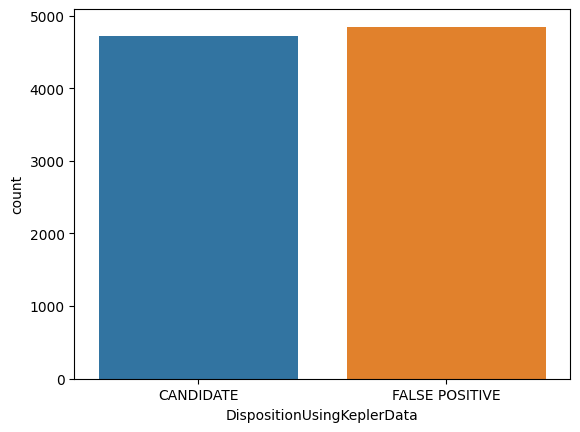

In [322]:
import seaborn as sns
sns.countplot(x = exoplanet_df['DispositionUsingKeplerData'])
print(exoplanet_df['DispositionUsingKeplerData'].value_counts())

ExoplanetArchiveDisposition
FALSE POSITIVE    4839
CONFIRMED         2671
CANDIDATE         2054
Name: count, dtype: int64


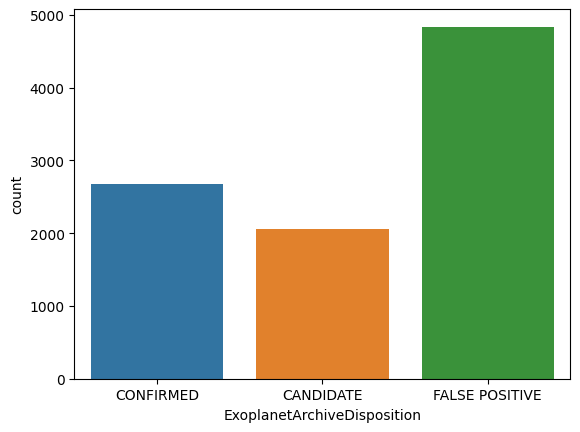

In [323]:
sns.countplot(x= exoplanet_df['ExoplanetArchiveDisposition'])
print(exoplanet_df['ExoplanetArchiveDisposition'].value_counts())

#### Tasks

-  Explore missing values by finding the the precentage of missing values for each column - print as a dataframe
-  Visualise the missing values of the columns with the 5 most percentage of missing value
-  Identify potential outliers of the numeric features. This can be done in many ways but you should probably try to write some kind of script/loop that will iterate through the features and calculate the number of values outside [Q1 - 1.5IQR ; Q3 + 1.5IQR]. Don't remove them just yet but discuss what could be a good approach.
-  Determine what to do with potential outlier: keep, replace or remove

                                                    Missing Percentage
KepID                                                         0.000000
KOIName                                                       0.000000
KeplerName                                                   72.051443
ExoplanetArchiveDisposition                                   0.000000
DispositionUsingKeplerData                                    0.000000
DispositionScore                                             15.788373
NotTransit-LikeFalsePositiveFlag                              0.000000
koi_fpflag_ss                                                 0.000000
CentroidOffsetFalsePositiveFlag                               0.000000
EphemerisMatchIndicatesContaminationFalsePositi...            0.000000
OrbitalPeriod, days                                           0.000000
OrbitalPeriodUpperUnc, days                                   4.746968
OrbitalPeriodLowerUnc, days                                   4.746968
Transi

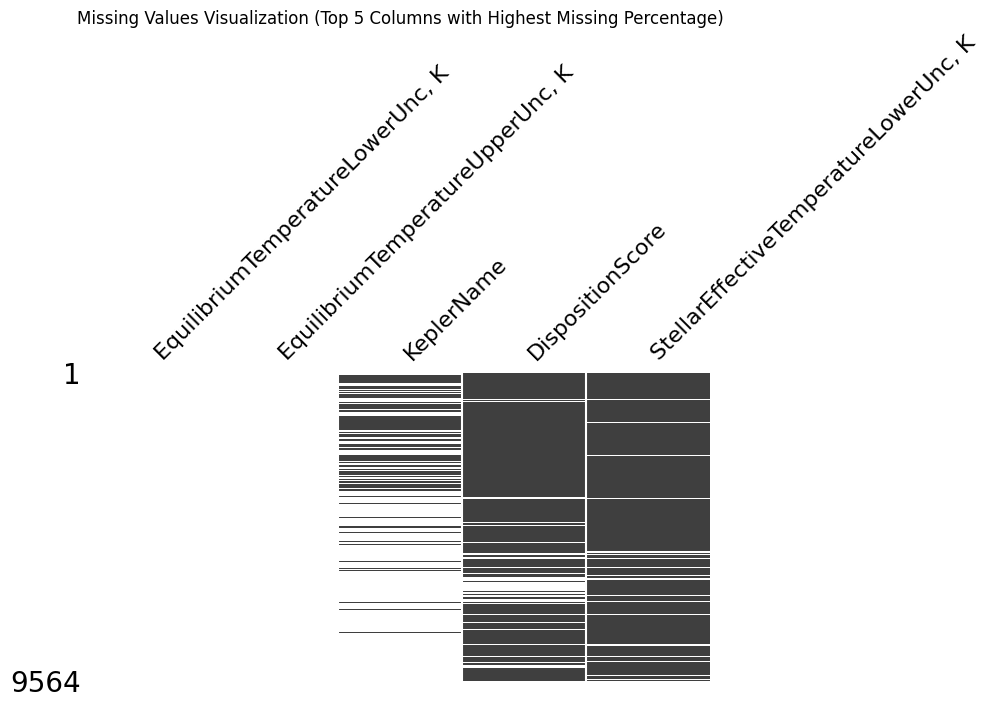

Feature 'KepID' has 0 potential outliers.
Feature 'DispositionScore' has 0 potential outliers.
Feature 'NotTransit-LikeFalsePositiveFlag' has 1531 potential outliers.
Feature 'koi_fpflag_ss' has 2226 potential outliers.
Feature 'CentroidOffsetFalsePositiveFlag' has 1889 potential outliers.
Feature 'EphemerisMatchIndicatesContaminationFalsePositiveFlag' has 1148 potential outliers.
Feature 'OrbitalPeriod, days' has 1567 potential outliers.
Feature 'OrbitalPeriodUpperUnc, days' has 1650 potential outliers.
Feature 'OrbitalPeriodLowerUnc, days' has 1650 potential outliers.
Feature 'TransitEpoch, BKJD' has 1046 potential outliers.
Feature 'TransitEpochUpperUnc, BKJD' has 838 potential outliers.
Feature 'TransitEpochLowerUnc, BKJD' has 838 potential outliers.
Feature 'ImpactParamete' has 82 potential outliers.
Feature 'ImpactParameterUpperUnc' has 736 potential outliers.
Feature 'ImpactParameterLowerUnc' has 120 potential outliers.
Feature 'TransitDuration, hrs' has 869 potential outliers.


In [324]:
import pandas as pd
import missingno as msno
import numpy as np 
import matplotlib.pyplot as plt

# 1. Explore missing values by finding the the precentage of missing values for each column - print as a dataframe
# Calculate the percentage of missing values for each column
missing_percentage = (exoplanet_df.isnull().sum() / len(exoplanet_df)) * 100

# Create a DataFrame to display the missing percentages
missing_df = pd.DataFrame({'Missing Percentage': missing_percentage})

# Print the DataFrame
print(missing_df)

# 2. Visualise the missing values of the columns with the 5 most percentage of missing value
# Sort columns by missing percentage in descending order and get the top 5
top_missing_cols = missing_percentage.sort_values(ascending=False).head(5).index

# Create a subset DataFrame with only the top missing columns
subset_df = exoplanet_df[top_missing_cols]

# Visualize missing values using missingno
msno.matrix(subset_df, figsize=(8, 4), sparkline=False)

# Set plot title
plt.title('Missing Values Visualization (Top 5 Columns with Highest Missing Percentage)')

# Show the plot
plt.show()

# Identify potential outliers of the numeric features. 
# This can be done in many ways but you should probably try to write some kind of script/loop 
# that will iterate through the features and calculate the number of values outside [Q1 - 1.5IQR ; Q3 + 1.5IQR]. 
# Don't remove them just yet but discuss what could be a good approach.
# Define a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Initialize a dictionary to store outlier counts for each feature
outlier_counts = {}

# Iterate through numeric features
for column in exoplanet_df.select_dtypes(include=[np.number]):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1 = exoplanet_df[column].quantile(0.25)
    q3 = exoplanet_df[column].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    iqr = q3 - q1
    
    # Define the lower and upper bounds for potential outliers
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    # Count the number of values outside the bounds
    outlier_count = len(exoplanet_df[(exoplanet_df[column] < lower_bound) | (exoplanet_df[column] > upper_bound)])
    
    # Store the outlier count in the dictionary
    outlier_counts[column] = outlier_count

# Print the outlier counts for each feature
for column, count in outlier_counts.items():
    print(f"Feature '{column}' has {count} potential outliers.")

# Discuss potential approaches for handling outliers


### 2. Feature Engineering

#### Tasks

-  Based only on the analysis above, you should be able to remove some columns (two of the columns will have 100% missing values). Remove these columns.
-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.) - there should be 4
-  Remove rows with missing values, NaNs, nulls and/or infinite values - if you want, you may choose to impute instead
-  If you you chose to remove or replace outliers do this now. If you chose to keep, move on
-  Create a correlation matrix and discuss (use only numeric columns, perhaps make an extra dataset just with numeric values) - drop appropriate columns
-  The values of `ExoplanetArchiveDisposition` and `ExoplanetArchiveDisposition` are categorical and if they are to act like labels, you should change them. Change them as follows: 'FALSE POSITIVE' values is assigned a numerical value of `0`, 'CANDIDATE' assigned `1`, and 'CONFIRMED' a `2`. Same assignment in both features. The easiest way is to create two new features, call them `KeplerDispositionStatus` and `ArchiveDispositionStatus`, and then drop the originalæ features. It will look something like this (the last couple of columns in the new dataframe):

In [325]:
# Based only on the analysis above, you should be able to remove some columns 
# (two of the columns will have 100% missing values). Remove these columns.

# Identify columns with 100% missing values
columns_to_remove = [column for column in exoplanet_df.columns if exoplanet_df[column].isnull().all()]

# Remove columns with 100% missing values
exoplanet_df = exoplanet_df.drop(columns=columns_to_remove)

# Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.) - there should be 4
columns_to_drop = ['KepID', 'KOIName', 'KeplerName', 'TCEDeliver']
exoplanet_df = exoplanet_df.drop(columns=columns_to_drop)

# Remove rows with missing values, NaNs, nulls and/or infinite values - if you want, 
# you may choose to impute instead

# Dropping all missing values
exoplanet_df = exoplanet_df.dropna()

# Impute missing values with the mean of each column
# df_imputed = df.fillna(df.mean())

# Keep outliers

The DataFrame has 43 columns.


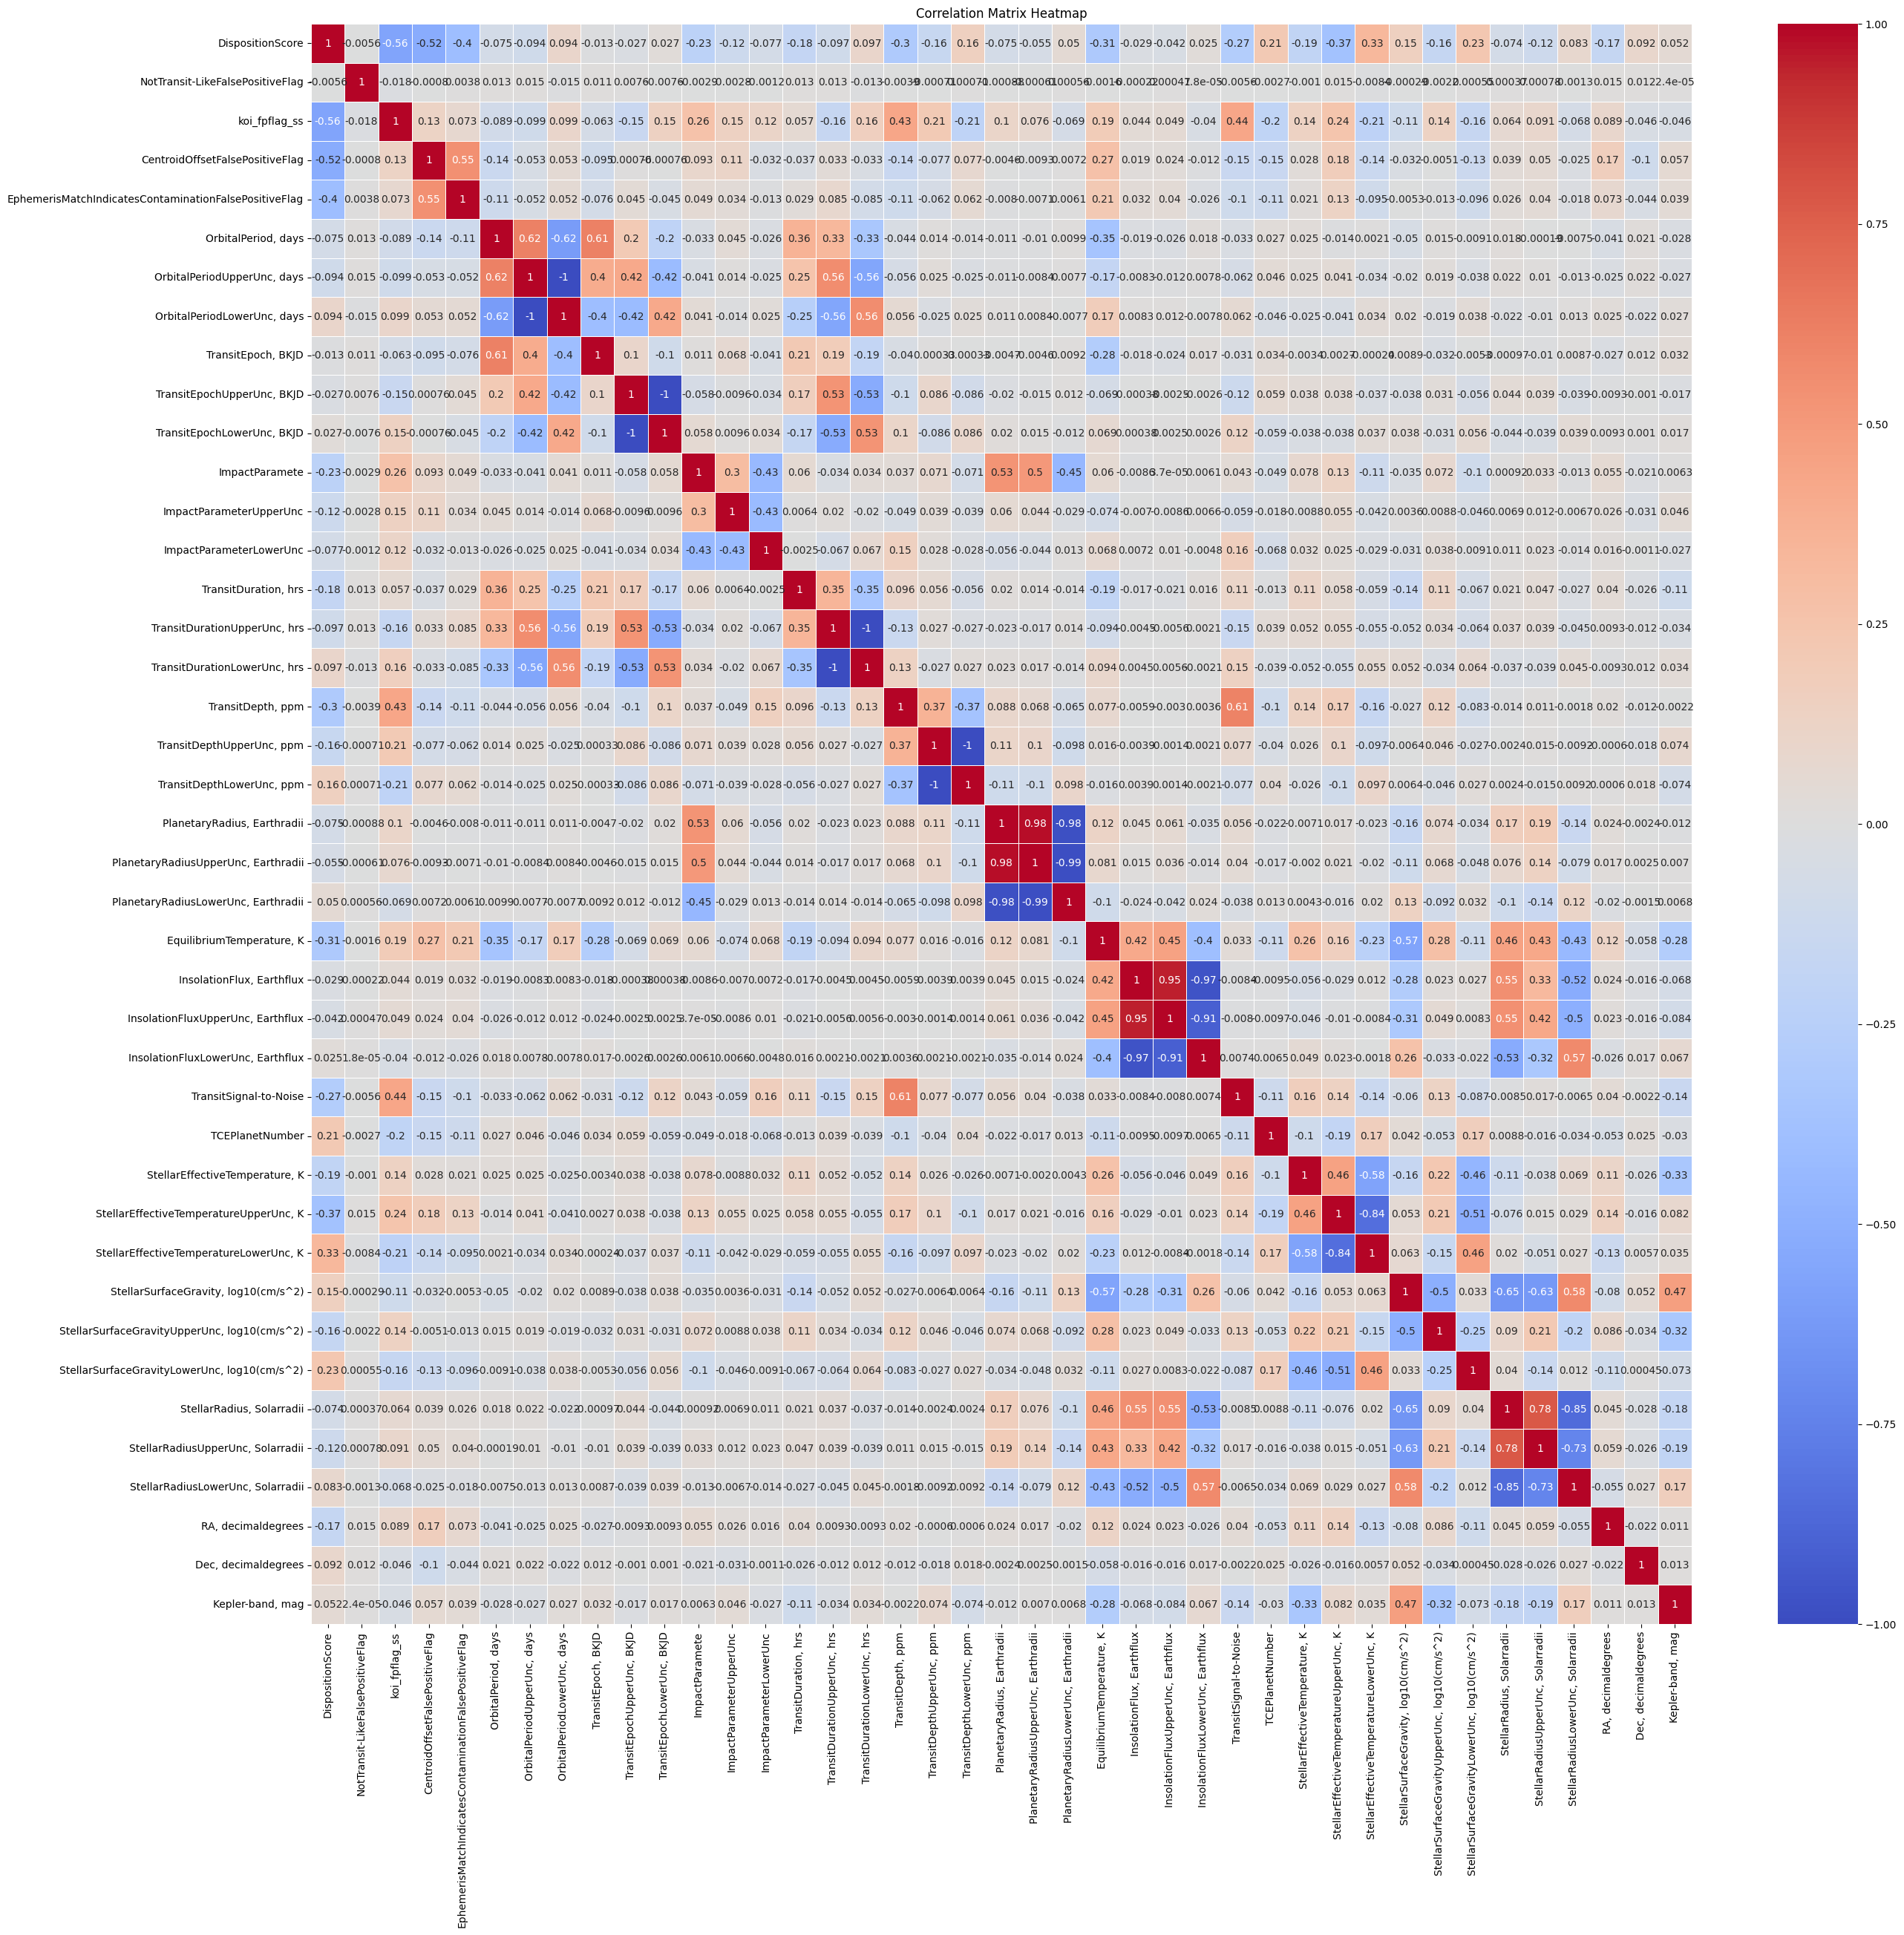

The DataFrame has 24 columns after dropping high correlated features.


In [326]:
# Create a correlation matrix and discuss 
# (use only numeric columns, perhaps make an extra dataset just with numeric values) - drop appropriate columns

# Get the number of columns
num_columns = exoplanet_df.shape[1]

# Print the number of columns
print(f"The DataFrame has {num_columns} columns.")

# Select only numeric columns
numeric_df = exoplanet_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix as a heatmap (optional)
plt.figure(figsize=(30, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Set a correlation threshold (e.g., 0.7 or -0.7)
correlation_threshold = 0.7

# Create a list to store the names of columns to drop
columns_to_drop = []

# Loop through the correlation matrix
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        # Skip comparing a column with itself
        if col1 == col2:
            continue
        
        # Check if the correlation value is above 0.7 or below -0.7
        if abs(correlation_matrix.loc[col1, col2]) >= correlation_threshold:
            columns_to_drop.append(col2)

# Drop the identified columns
exoplanet_df = exoplanet_df.drop(columns=columns_to_drop)

# Get the number of columns
num_columns_after = exoplanet_df.shape[1]

# Print the number of columns
print(f"The DataFrame has {num_columns_after} columns after dropping high correlated features.")

In [327]:
# The values of ExoplanetArchiveDisposition and ExoplanetArchiveDisposition are categorical 
# and if they are to act like labels, you should change them. Change them as follows: 'FALSE POSITIVE' 
# values is assigned a numerical value of 0, 'CANDIDATE' assigned 1, and 'CONFIRMED' a 2. 
# Same assignment in both features. The easiest way is to create two new features, 
# call them KeplerDispositionStatus and ArchiveDispositionStatus, and then drop the originalæ features. 
# It will look something like this (the last couple of columns in the new dataframe):

exoplanet_df.head()

# Create a mapping for the new numerical values
mapping = {
    'FALSE POSITIVE': 0,
    'CANDIDATE': 1,
    'CONFIRMED': 2
}

# Create new columns with numerical values
exoplanet_df['KeplerDispositionStatus'] = exoplanet_df['DispositionUsingKeplerData'].map(mapping)
exoplanet_df['ArchiveDispositionStatus'] = exoplanet_df['ExoplanetArchiveDisposition'].map(mapping)

# Drop the original columns
exoplanet_df = exoplanet_df.drop(columns=['ExoplanetArchiveDisposition', 'DispositionUsingKeplerData'])

# Print the updated DataFrame
exoplanet_df.head()


,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","TransitEpoch, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDepth, ppm","EquilibriumTemperature, K",TransitSignal-to-Noise,TCEPlanetNumber,"StellarEffectiveTemperature, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag",KeplerDispositionStatus,ArchiveDispositionStatus
0,1.000,0,0,0,0,9.488036,170.538750,0.146,0.318,-0.146,2.95750,615.8,793.0,35.8,1.0,5455.0,4.467,0.064,-0.096,291.93423,48.141651,15.347,1,2
1,0.969,0,0,0,0,54.418383,162.513840,0.586,0.059,-0.443,4.50700,874.8,443.0,25.8,2.0,5455.0,4.467,0.064,-0.096,291.93423,48.141651,15.347,1,2
2,0.000,0,0,0,0,19.899140,175.850252,0.969,5.126,-0.077,1.78220,10829.0,638.0,76.3,1.0,5853.0,4.544,0.044,-0.176,297.00482,48.134129,15.436,1,1
3,0.000,0,1,0,0,1.736952,170.307565,1.276,0.115,-0.092,2.40641,8079.2,1395.0,505.6,1.0,5805.0,4.564,0.053,-0.168,285.53461,48.285210,15.597,0,0
4,1.000,0,0,0,0,2.525592,171.595550,0.701,0.235,-0.478,1.65450,603.3,1406.0,40.9,1.0,6031.0,4.438,0.070,-0.210,288.75488,48.226200,15.509,1,2


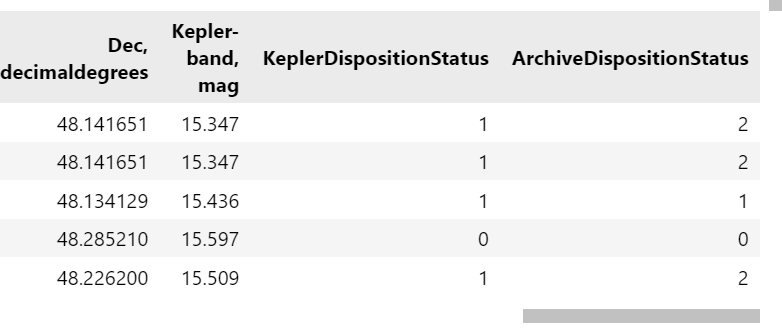

#### Tasks continued
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant
-  Place `KeplerDispositionStatus` as the target and remove the following from the features: `DispositionScore`, `KeplerDispositionStatus`, `ArchiveDispositionStatus
- Consider scaling your (numeric) data
- You should now have two datasets, one with cleaned features and one with the target labels (1 for Candidate and 0 otherwise)

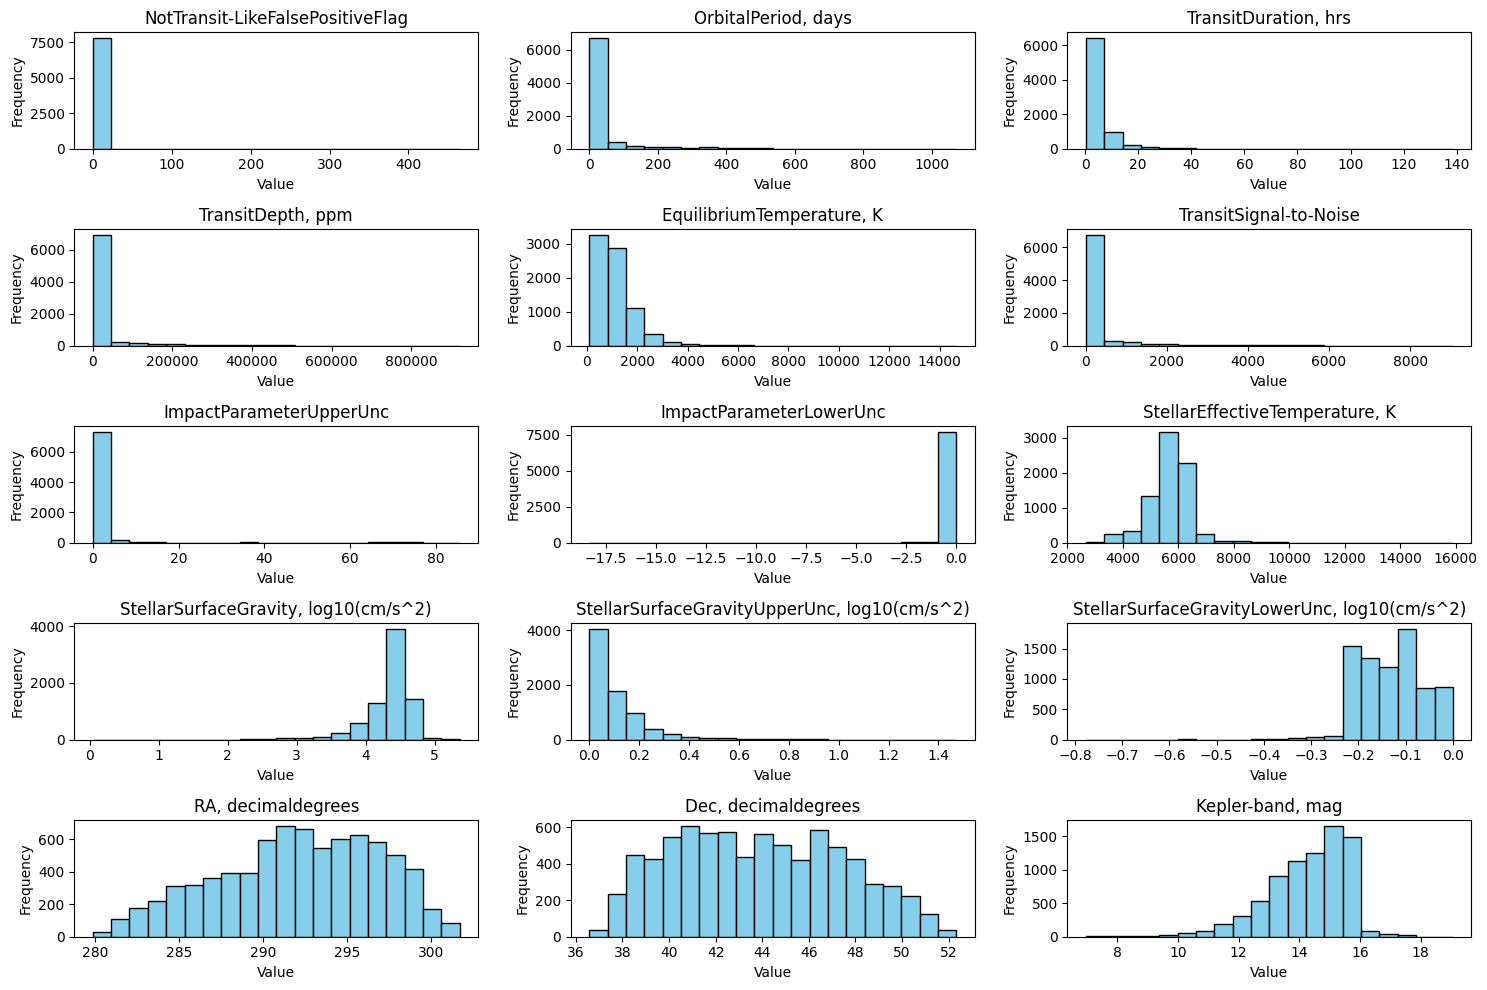

In [328]:
# Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant

# Understanding distribution of data with histograms

# Specify the columns to plot
columns_to_plot = [
    'NotTransit-LikeFalsePositiveFlag',
    'OrbitalPeriod, days',
    'TransitDuration, hrs',
    'TransitDepth, ppm',
    'EquilibriumTemperature, K',
    'TransitSignal-to-Noise',
    'ImpactParameterUpperUnc',
    'ImpactParameterLowerUnc',
    'StellarEffectiveTemperature, K',
    'StellarSurfaceGravity, log10(cm/s^2)',
    'StellarSurfaceGravityUpperUnc, log10(cm/s^2)',
    'StellarSurfaceGravityLowerUnc, log10(cm/s^2)',
    'RA, decimaldegrees',
    'Dec, decimaldegrees',
    'Kepler-band, mag'
]

# Create subplots for histograms
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    ax.hist(exoplanet_df[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

# Explain why transforming data drops accuracy sooo much


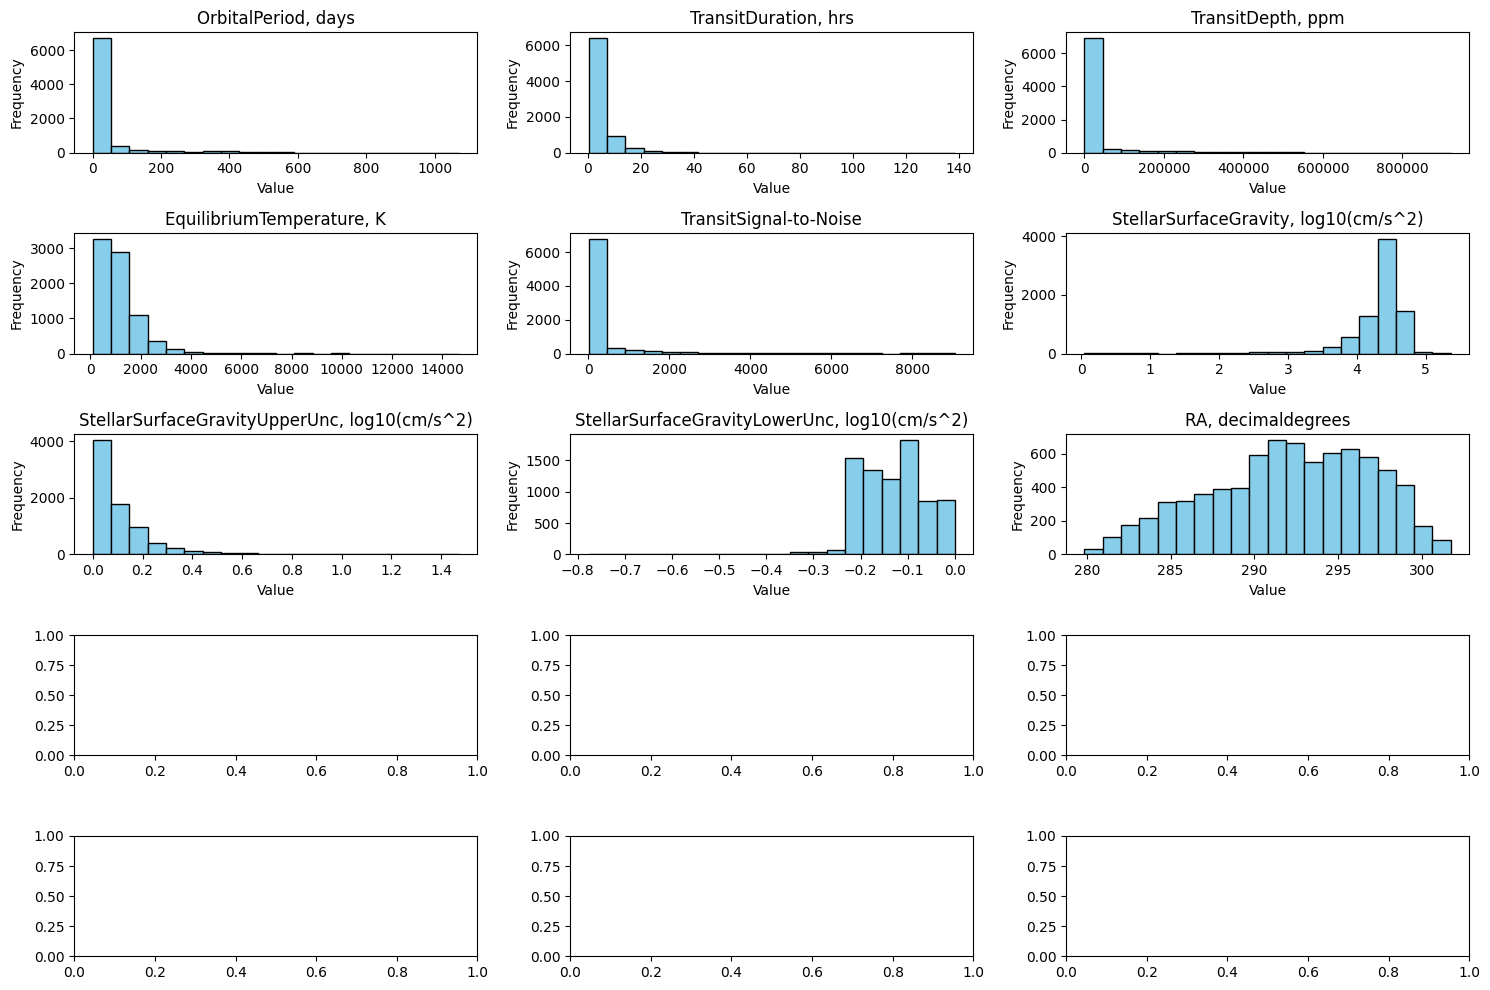

In [329]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

columns_to_transform = [
    'OrbitalPeriod, days',
    'TransitDuration, hrs',
    'TransitDepth, ppm',
    'EquilibriumTemperature, K',
    'TransitSignal-to-Noise',
    'StellarSurfaceGravity, log10(cm/s^2)',
    'StellarSurfaceGravityUpperUnc, log10(cm/s^2)',
    'StellarSurfaceGravityLowerUnc, log10(cm/s^2)',
    'RA, decimaldegrees',
]

# Apply Box-Cox transformation to the selected columns
# for column in columns_to_transform:
#     # Check if the column contains any negative values (Box-Cox requires non-negative values)
#     if exoplanet_df[column].min() <= 0:
#         # If there are negative values, shift the data by a small positive constant
#         min_val = exoplanet_df[column].min()
#         exoplanet_df[column] = exoplanet_df[column] - min_val + 0.001

#     # Apply Box-Cox transformation
#     exoplanet_df[column], _ = boxcox(exoplanet_df[column])


# Create subplots for histograms
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Plot histograms for each column
for i, column in enumerate(columns_to_transform):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    ax.hist(exoplanet_df[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [330]:
# Place KeplerDispositionStatus as the target and remove the following from the features: 
# DispositionScore, KeplerDispositionStatus, `ArchiveDispositionStatus

# Set KeplerDispositionStatus as the target variable
target = exoplanet_df['KeplerDispositionStatus']

# Remove specified columns from the features
features = exoplanet_df.drop(columns=['DispositionScore', 'KeplerDispositionStatus', 'ArchiveDispositionStatus'])

exoplanet_df.head()

,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","TransitEpoch, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDepth, ppm","EquilibriumTemperature, K",TransitSignal-to-Noise,TCEPlanetNumber,"StellarEffectiveTemperature, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag",KeplerDispositionStatus,ArchiveDispositionStatus
0,1.000,0,0,0,0,9.488036,170.538750,0.146,0.318,-0.146,2.95750,615.8,793.0,35.8,1.0,5455.0,4.467,0.064,-0.096,291.93423,48.141651,15.347,1,2
1,0.969,0,0,0,0,54.418383,162.513840,0.586,0.059,-0.443,4.50700,874.8,443.0,25.8,2.0,5455.0,4.467,0.064,-0.096,291.93423,48.141651,15.347,1,2
2,0.000,0,0,0,0,19.899140,175.850252,0.969,5.126,-0.077,1.78220,10829.0,638.0,76.3,1.0,5853.0,4.544,0.044,-0.176,297.00482,48.134129,15.436,1,1
3,0.000,0,1,0,0,1.736952,170.307565,1.276,0.115,-0.092,2.40641,8079.2,1395.0,505.6,1.0,5805.0,4.564,0.053,-0.168,285.53461,48.285210,15.597,0,0
4,1.000,0,0,0,0,2.525592,171.595550,0.701,0.235,-0.478,1.65450,603.3,1406.0,40.9,1.0,6031.0,4.438,0.070,-0.210,288.75488,48.226200,15.509,1,2


In [351]:
from sklearn.preprocessing import StandardScaler

# Consider scaling your (numeric) data

# Check Data Scaling: Logistic Regression can be sensitive to the scale of input features. 
# Ensure that your input features are appropriately scaled. You can use techniques like StandardScaler or MinMaxScaler to standardize or normalize your data.

# Inspect Data Types:
print(exoplanet_df.dtypes) # All columns are numeric

# Check Data Ranges:
# Assuming df is your DataFrame with numerical columns
numerical_columns = exoplanet_df.select_dtypes(include=['int64', 'float64'])

# Calculate the minimum and maximum values for each numerical column
min_values = numerical_columns.min()
max_values = numerical_columns.max()

# Create a DataFrame to display the ranges
data_range = pd.DataFrame({'Min': min_values, 'Max': max_values})

# Print the data range for each numerical column
print(data_range)

# This code will produce a DataFrame (data_range) that shows the minimum and maximum values for each numerical column in your DataFrame df. 
# By examining the range of values in each column, you can identify columns with larger ranges compared to others, which may indicate the need for scaling.

# Create a StandardScaler instance
scaler = StandardScaler()

# Select the columns that need scaling
columns_to_scale = [
    'NotTransit-LikeFalsePositiveFlag',
    'OrbitalPeriod, days',
    'TransitDuration, hrs',
    'TransitDepth, ppm',
    'EquilibriumTemperature, K',
    'TransitSignal-to-Noise',
    'ImpactParameterUpperUnc',
    'ImpactParameterLowerUnc',
    'StellarEffectiveTemperature, K',
    'StellarSurfaceGravity, log10(cm/s^2)',
    'StellarSurfaceGravityUpperUnc, log10(cm/s^2)',
    'StellarSurfaceGravityLowerUnc, log10(cm/s^2)',
    'RA, decimaldegrees',
    'Dec, decimaldegrees',
    'Kepler-band, mag'
]

# Apply scaling to the selected columns
exoplanet_df[columns_to_scale] = scaler.fit_transform(exoplanet_df[columns_to_scale])

exoplanet_df.head()

# Try find out if data is getting scaled correctly (Standarized scaler)


DispositionScore                                         float64
NotTransit-LikeFalsePositiveFlag                         float64
koi_fpflag_ss                                              int64
CentroidOffsetFalsePositiveFlag                            int64
EphemerisMatchIndicatesContaminationFalsePositiveFlag      int64
OrbitalPeriod, days                                      float64
TransitEpoch, BKJD                                       float64
ImpactParamete                                           float64
ImpactParameterUpperUnc                                  float64
ImpactParameterLowerUnc                                  float64
TransitDuration, hrs                                     float64
TransitDepth, ppm                                        float64
EquilibriumTemperature, K                                float64
TransitSignal-to-Noise                                   float64
TCEPlanetNumber                                          float64
StellarEffectiveTemperatu

,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","TransitEpoch, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDepth, ppm","EquilibriumTemperature, K",TransitSignal-to-Noise,TCEPlanetNumber,"StellarEffectiveTemperature, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag",KeplerDispositionStatus,ArchiveDispositionStatus
0,1.000,-0.030172,0,0,0,-0.320503,170.538750,0.146,-0.182028,0.295435,-0.385943,-0.300739,-0.409649,-0.307330,1.0,-0.297055,0.348736,-0.424711,0.526629,-0.029139,1.196093,0.776930,1,2
1,0.969,-0.030172,0,0,0,0.197005,162.513840,0.586,-0.208156,-0.330073,-0.135936,-0.297637,-0.830342,-0.319042,2.0,-0.297055,0.348736,-0.424711,0.526629,-0.029139,1.196093,0.776930,1,2
2,0.000,-0.030172,0,0,0,-0.200588,175.850252,0.969,0.303001,0.440755,-0.575574,-0.178428,-0.595956,-0.259896,1.0,0.207675,0.531679,-0.575340,-0.662090,1.030117,1.194003,0.843600,1,1
3,0.000,-0.030172,1,0,0,-0.409780,170.307565,1.276,-0.202506,0.409164,-0.474860,-0.211359,0.313943,0.242902,1.0,0.146803,0.579196,-0.507557,-0.543218,-1.366031,1.235974,0.964206,0,0
4,1.000,-0.030172,0,0,0,-0.400697,171.595550,0.701,-0.190401,-0.403786,-0.596178,-0.300888,0.327165,-0.301357,1.0,0.433409,0.279835,-0.379522,-1.167296,-0.693310,1.219581,0.898285,1,2


In [352]:
# After scaling
print("\nAfter Scaling:")
print(exoplanet_df[columns_to_scale].describe())


After Scaling:
       NotTransit-LikeFalsePositiveFlag  OrbitalPeriod, days  \
count                      7.803000e+03          7803.000000   
mean                       8.650719e-18             0.000000   
std                        1.000064e+00             1.000064   
min                       -3.017225e-02            -0.426794   
25%                       -3.017225e-02            -0.401504   
50%                       -3.017225e-02            -0.341116   
75%                       -3.017225e-02            -0.152326   
max                        8.818646e+01            11.908690   

       TransitDuration, hrs  TransitDepth, ppm  EquilibriumTemperature, K  \
count           7803.000000        7803.000000                7803.000000   
mean               0.000000           0.000000                   0.000000   
std                1.000064           1.000064                   1.000064   
min               -0.814270          -0.308060                  -1.252237   
25%               -0.4

In [353]:
# You should now have two datasets, one with cleaned features and one with the target labels 
# (1 for Candidate and 0 otherwise)

print(target)
features.head()

0       1
1       1
2       1
3       0
4       1
       ..
9559    0
9560    1
9561    0
9562    1
9563    0
Name: KeplerDispositionStatus, Length: 7803, dtype: int64


,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","TransitEpoch, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDepth, ppm","EquilibriumTemperature, K",TransitSignal-to-Noise,TCEPlanetNumber,"StellarEffectiveTemperature, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
0,0,0,0,0,9.488036,170.538750,0.146,0.318,-0.146,2.95750,615.8,793.0,35.8,1.0,5455.0,4.467,0.064,-0.096,291.93423,48.141651,15.347
1,0,0,0,0,54.418383,162.513840,0.586,0.059,-0.443,4.50700,874.8,443.0,25.8,2.0,5455.0,4.467,0.064,-0.096,291.93423,48.141651,15.347
2,0,0,0,0,19.899140,175.850252,0.969,5.126,-0.077,1.78220,10829.0,638.0,76.3,1.0,5853.0,4.544,0.044,-0.176,297.00482,48.134129,15.436
3,0,1,0,0,1.736952,170.307565,1.276,0.115,-0.092,2.40641,8079.2,1395.0,505.6,1.0,5805.0,4.564,0.053,-0.168,285.53461,48.285210,15.597
4,0,0,0,0,2.525592,171.595550,0.701,0.235,-0.478,1.65450,603.3,1406.0,40.9,1.0,6031.0,4.438,0.070,-0.210,288.75488,48.226200,15.509


### 3+4. Train, Test, Validation, Cross Validation + Models
-  Consider which method to use to split the data and do the appropriate splits - if using CV still make a test set
-  Use claasification algorithms to train a model - which and how many is up to you

In [333]:
# Consider which method to use to split the data and do the appropriate splits - if using CV still make a test set

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train-Validation-Test Split:
# Split the data into features and target labels
X = features  # Features
y = target    # Target labels

# Split the data into training, validation, and test sets (e.g., 70% - 15% - 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of the sets
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

# from sklearn.model_selection import cross_val_score

# # Use your machine learning model (e.g., classifier or regressor)
# # Define your model as 'model'

# # Perform cross-validation (e.g., 5-fold cross-validation)
# cv_scores = cross_val_score(model, X, y, cv=5)

# # Print the cross-validation scores
# print("Cross-Validation Scores:", cv_scores)

# # Optionally, split a separate test set for final evaluation (not used during training or CV)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train your model on the training set
# model.fit(X_train, y_train)

# # Evaluate your model on the test set
# test_score = model.score(X_test, y_test)
# print("Test Set Score:", test_score)

Training set size: 5462
Validation set size: 1170
Test set size: 1171


In [334]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Logistic Regression:

# Initialize and train a Logistic Regression model
# logistic_regression = LogisticRegression(random_state=42)
# logistic_regression.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = logistic_regression.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)

print("Validation Set Accuracy:", accuracy)
print("\nClassification Report on Validation Set:\n", classification_rep)

# Now, evaluate the final model on the test set
y_test_pred = logistic_regression.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

print("\nTest Set Accuracy:", accuracy_test)
print("\nClassification Report on Test Set:\n", classification_rep_test)

# # Create a machine learning pipeline
# pipe = make_pipeline(StandardScaler(), LogisticRegression())

# # Fit the pipeline on the training data
# pipe.fit(X_train, y_train)

# # Evaluate the model's accuracy on the testing data
# accuracy = pipe.score(X_test, y_test)
# print("Test Set Accuracy:", accuracy)

# Based on the provided results, it appears that the model is neither overfitting nor underfitting. Instead, it seems to be achieving a reasonably good 
# balance between training and validation/test performance. Here's why:
# Validation Set Accuracy: The accuracy on the validation set is 0.789, and the test set accuracy is 0.794. These accuracies are relatively close to each other, 
# indicating that the model is generalizing well to unseen data.
# Classification Report on Validation Set: The precision, recall, and F1-scores for both classes (0 and 1) on the validation set are reasonably balanced. 
# For example, the F1-score for class 0 is 0.75, and for class 1, it's 0.82, suggesting that the model doesn't favor one class significantly over the other.
# Classification Report on Test Set: Similar to the validation set, the classification report on the test set shows a reasonable balance in precision, recall, 
# and F1-scores for both classes. This indicates that the model's performance is consistent on different datasets.

Validation Set Accuracy: 0.7888888888888889

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.83      0.68      0.75       538
           1       0.77      0.88      0.82       632

    accuracy                           0.79      1170
   macro avg       0.80      0.78      0.78      1170
weighted avg       0.79      0.79      0.79      1170


Test Set Accuracy: 0.7941929974380871

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.85      0.70      0.76       561
           1       0.76      0.88      0.82       610

    accuracy                           0.79      1171
   macro avg       0.80      0.79      0.79      1171
weighted avg       0.80      0.79      0.79      1171



In [335]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Hyperparameter tunning

# Define a dictionary that specifies the hyperparameters and their corresponding values to search over. F
# For logistic regression, common hyperparameters include 'C' (inverse of regularization strength) and 'penalty' (L1 or L2 regularization).

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1  # Enable verbose output for progress
)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Initialize a Logistic Regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(random_state=42, **best_params)

# Train the best model on the training data
best_logistic_regression.fit(X_train, y_train)

# Predict on the validation set using the best model
y_val_pred = best_logistic_regression.predict(X_val)

# Evaluate the best model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
classification_rep_val = classification_report(y_val, y_val_pred)

print("Best Hyperparameters:", best_params)
print("Validation Set Accuracy:", accuracy_val)
print("\nClassification Report on Validation Set:\n", classification_rep_val)

# Now, evaluate the best model on the test set
y_test_pred = best_logistic_regression.predict(X_test)

# Evaluate the best model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

print("\nTest Set Accuracy:", accuracy_test)
print("\nClassification Report on Test Set:\n", classification_rep_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\Aitana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Aitana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Best Hyperparameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}
Validation Set Accuracy: 0.9529914529914529

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       538
           1       0.94      0.97      0.96       632

    accuracy                           0.95      1170
   macro avg       0.95      0.95      0.95      1170
weighted avg       0.95      0.95      0.95      1170


Test Set Accuracy: 0.9564474807856533

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       561
           1       0.95      0.97      0.96       610

    accuracy                           0.96      1171
   macro avg       0.96      0.96      0.96      1171
weighted avg       0.96      0.96      0.96      1171



C:\Users\Aitana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [336]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Decision Trees:
# Initialize and train a Decision Tree Classifier model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = decision_tree.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)

print("Validation Set Accuracy:", accuracy)
print("\nClassification Report on Validation Set:\n", classification_rep)

# Now, evaluate the final model on the test set
y_test_pred = decision_tree.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

print("\nTest Set Accuracy:", accuracy_test)
print("\nClassification Report on Test Set:\n", classification_rep_test)

# The provided results suggest that the model is likely overfitting. Here's why:
# Validation Set Accuracy: The accuracy on the validation set is extremely high at 0.998, and the test set accuracy is also very high at 0.997. 
# Such high accuracies often indicate that the model is fitting the training data almost perfectly.
# Classification Report: In both the validation and test sets, the precision, recall, and F1-scores for both classes (0 and 1) are all equal to 1.00. 
# This is a strong indicator that the model is making perfect predictions on both sets.

Validation Set Accuracy: 0.9982905982905983

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       538
           1       1.00      1.00      1.00       632

    accuracy                           1.00      1170
   macro avg       1.00      1.00      1.00      1170
weighted avg       1.00      1.00      1.00      1170


Test Set Accuracy: 0.9974380871050385

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1171
   macro avg       1.00      1.00      1.00      1171
weighted avg       1.00      1.00      1.00      1171



In [337]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tunning

# Define a range of hyperparameters to search over
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],  # Adjust the maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required at each leaf node
    'criterion': ['gini', 'entropy']      # Split criterion (Gini impurity or entropy)
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1  # Enable verbose output for progress
)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Initialize a Decision Tree Classifier with the best hyperparameters
best_decision_tree = DecisionTreeClassifier(random_state=42, **best_params)

# Train the best model on the training data
best_decision_tree.fit(X_train, y_train)

# Predict on the validation set using the best model
y_val_pred = best_decision_tree.predict(X_val)

# Evaluate the best model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
classification_rep_val = classification_report(y_val, y_val_pred)

print("Best Hyperparameters:", best_params)
print("Validation Set Accuracy:", accuracy_val)
print("\nClassification Report on Validation Set:\n", classification_rep_val)

# Now, evaluate the best model on the test set
y_test_pred = best_decision_tree.predict(X_test)

# Evaluate the best model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

print("\nTest Set Accuracy:", accuracy_test)
print("\nClassification Report on Test Set:\n", classification_rep_test)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Validation Set Accuracy: 1.0

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       538
           1       1.00      1.00      1.00       632

    accuracy                           1.00      1170
   macro avg       1.00      1.00      1.00      1170
weighted avg       1.00      1.00      1.00      1170


Test Set Accuracy: 0.9982920580700256

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1171
   macro avg       1.00      1.00      1.00      1171
weighted avg       1.00      1.00      1.00      1171



In [338]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Naive Bayes

# Initialize and train a Gaussian Naive Bayes Classifier model
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = naive_bayes_classifier.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)

print("Validation Set Accuracy:", accuracy)
print("\nClassification Report on Validation Set:\n", classification_rep)

# Now, evaluate the final model on the test set
y_test_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

print("\nTest Set Accuracy:", accuracy_test)
print("\nClassification Report on Test Set:\n", classification_rep_test)

# it's achieving a reasonably good balance between training and validation/test performance. Here's why:
# Validation Set Accuracy: The accuracy on the validation set is 0.726, which is fairly close to the accuracy on the test set (0.740). 
# A small difference between the validation and test accuracies suggests that the model is likely generalizing well to unseen data.
# Classification Report on Validation Set: The precision, recall, and F1-score for both classes (0 and 1) are reasonably balanced on the validation set. For example, 
# the F1-score for class 0 is 0.60, and for class 1, it's 0.79, indicating that the model doesn't favor one class significantly over the other.
# Classification Report on Test Set: Similar to the validation set, the classification report on the test set shows a reasonable balance in precision, recall, and 
# F1-scores for both classes. This suggests that the model's performance is consistent on different datasets.

Validation Set Accuracy: 0.7264957264957265

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.91      0.45      0.60       538
           1       0.67      0.96      0.79       632

    accuracy                           0.73      1170
   macro avg       0.79      0.71      0.70      1170
weighted avg       0.78      0.73      0.70      1170


Test Set Accuracy: 0.740392826643894

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.90      0.51      0.65       561
           1       0.68      0.95      0.79       610

    accuracy                           0.74      1171
   macro avg       0.79      0.73      0.72      1171
weighted avg       0.79      0.74      0.73      1171



In [339]:
# K-nearest Neighbors

### 5. Evaluate
-  Write three functions:
     1. One that calculates accuracy, precision, recall, specificity, and f1-score
     2. One that outputs the confusion matrix
     3. One that diplays the precision-recall curve as well as the ROC-cruve
-  Use your newly written functions to evaluate your models using the test data created in (3+4)